# Bitcoin Investing Strategy – Research Notebook

This notebook is the starting point for developing a Bitcoin investing strategy.  
The goal is to explore historical BTC price data, experiment with technical indicators,  
and eventually design a systematic strategy that can be tested and optimized.

---

## 📊 Dataset

- **Source**: [Cryptocurrency Historical Prices (Kaggle)](https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv)  
- **File used**: `coin_Bitcoin.csv`  
- **Frequency**: Daily data (Open, High, Low, Close, Volume, Market Cap)  

This dataset provides a reliable foundation to explore Bitcoin price behavior  
before moving into live or API-driven data sources.

---

## 🎯 Objectives

1. Load and clean the Bitcoin historical dataset.  
2. Explore descriptive statistics and visualize long-term trends.  
3. Implement and test common technical indicators (e.g., moving averages, volatility measures).  
4. Formulate candidate investment strategies.  
5. Backtest and evaluate strategy performance.  
6. Optimize and prepare for a production-ready Python implementation.  

---

## 🛠️ Environment & Tools

- **uv** for environment and dependency management.  
- **pandas, numpy** for data wrangling.  
- **matplotlib, seaborn** for visualization.  
- **jupyter** for iterative exploration.  
- Later: backtesting and optimization libraries (to be decided).  

---

👉 This notebook is exploratory.  
The final optimized strategy will be consolidated into a standalone Python project for reproducibility and deployment.


In [17]:
# libraries used
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ccxt
from datetime import datetime, timedelta, timezone


In [2]:
# --- Load data ---
file_path = "data/btc_historical.csv"
df = pd.read_csv(file_path)

# --- Preview ---
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (2991, 10)


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [3]:
# Column info and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [4]:
# Summary statistics
df.describe(include="all")


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991,2991,2991,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
unique,NaN,1,1,2991,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Bitcoin,BTC,2013-04-29 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2991,2991,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,1496.000000,NaN,NaN,NaN,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,NaN,NaN,NaN,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,NaN,NaN,NaN,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,NaN,NaN,NaN,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,NaN,NaN,NaN,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,NaN,NaN,NaN,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11


In [5]:
# Check missing values
df.isna().sum()


SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

## 🔎 Data Exploration Summary

- **Dataset size**: 2,991 daily observations (2013–2021).  
- **Core columns**: `Open`, `High`, `Low`, `Close`, `Volume`, `Marketcap`.  
- **Redundant columns**: `SNo`, `Name`, `Symbol` (all constant → dropped).  
- **Date column**: converted to `datetime` and set as the index for time-series analysis.  
- **Price range**:  
  - Minimum close ≈ **$68** (2013).  
  - Maximum close ≈ **$63,503**.  
- **Volume & Market Cap**: very large values with high variance; may require log-scaling for visualization.  
- **Data completeness**: no major missing values detected.  

---

### 🛠️ Cleaning steps
1. Dropped non-informative columns (`SNo`, `Name`, `Symbol`).  
2. Converted `Date` to `datetime` and sorted chronologically.  
3. Ensured all numeric columns are in the correct type (`float`).  

---

### 📈 First insights
- Bitcoin shows extreme growth and volatility across the sample period.  
- The dataset is now clean, indexed by date, and ready for:  
  - Return calculations.  
  - Trend and volatility analysis.  
  - Backtesting of potential strategies.  


In [7]:
# Drop unused columns
df_clean = df.drop(columns=["SNo", "Name", "Symbol"])

# Convert Date to datetime and set as index
df_clean["Date"] = pd.to_datetime(df_clean["Date"])
df_clean = df_clean.sort_values("Date").set_index("Date")

# Ensure numeric columns are float (sometimes CSVs have issues)
numeric_cols = ["High", "Low", "Open", "Close", "Volume", "Marketcap"]
df_clean[numeric_cols] = df_clean[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Check result
df_clean.info()
df_clean.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2991 entries, 2013-04-29 23:59:59 to 2021-07-06 23:59:59
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2991 non-null   float64
 1   Low        2991 non-null   float64
 2   Open       2991 non-null   float64
 3   Close      2991 non-null   float64
 4   Volume     2991 non-null   float64
 5   Marketcap  2991 non-null   float64
dtypes: float64(6)
memory usage: 163.6 KB


,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,
2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


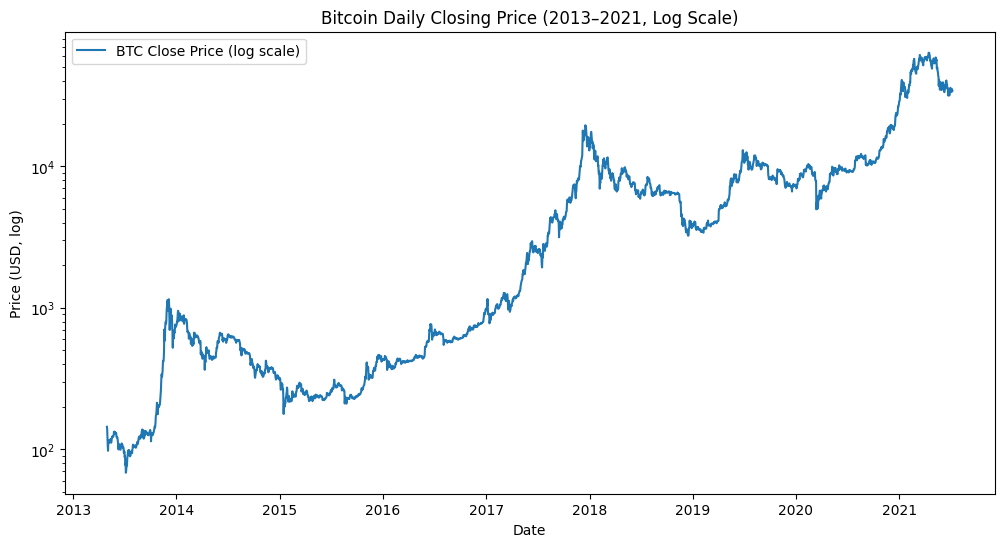

In [9]:

plt.figure(figsize=(12,6))
plt.plot(df_clean.index, df_clean["Close"], label="BTC Close Price (log scale)")
plt.yscale("log")
plt.title("Bitcoin Daily Closing Price (2013–2021, Log Scale)")
plt.xlabel("Date")
plt.ylabel("Price (USD, log)")
plt.legend()
plt.show()



## 🔄 Fetching New Data from Binance

The Kaggle dataset ends in mid-2021, so we need to extend it with more recent data.  
To achieve this, we use the **Binance API** (via the `ccxt` library) to fetch daily OHLCV data (`Open`, `High`, `Low`, `Close`, `Volume`).

---

### 📌 Steps followed

1. **Determine the fetch start date**  
   - We select the **day before the last entry** in the Kaggle dataset.  
   - This ensures there is an overlap between the old and new data, allowing us to validate continuity and avoid gaps.  

2. **Fetch data from Binance**  
   - Use `ccxt` to connect to the Binance exchange.  
   - Retrieve daily candles (`timeframe="1d"`) for the `BTC/USDT` pair starting from the chosen date.  

3. **Convert to DataFrame**  
   - Transform Binance’s OHLCV list into a Pandas DataFrame.  
   - Convert timestamps from milliseconds to datetime format and set `Date` as the index.  

4. **Validate overlap**  
   - Compare the last Kaggle closing price with the first Binance closing price.  
   - Small differences (a few dollars) are expected because Binance uses **USDT** while Kaggle data is in **USD**.  

5. **Merge datasets**  
   - Concatenate the Kaggle data with the new Binance data.  
   - Remove duplicate dates, keeping the most recent entry.  

6. **Save updated dataset**  
   - Store the extended dataset as `coin_Bitcoin_updated.csv` in the `data/` folder.  

---

### ✅ Outcome

- The dataset now covers **2013 → Present**, with daily OHLCV data.  
- Market cap data is only available from Kaggle, since Binance does not provide it.  
- The resulting file is ready for further analysis, strategy design, and backtesting.  


In [18]:
# --- Step 1: Load Kaggle dataset ---
df_kaggle = pd.read_csv(file_path)

# Ensure Date column is datetime
df_kaggle["Date"] = pd.to_datetime(df_kaggle["Date"])
df_kaggle.sort_values("Date", inplace=True)

print("Kaggle dataset covers:", df_kaggle["Date"].min(), "→", df_kaggle["Date"].max())

# --- Step 2: Determine fetch start date (day before last Kaggle date) ---
last_kaggle_date = df_kaggle["Date"].iloc[-1]
fetch_start = last_kaggle_date - timedelta(days=1)
print("Fetching Binance data starting from:", fetch_start.date())

# --- Step 3: Fetch data from Binance ---
exchange = ccxt.binance()
symbol = "BTC/USDT"
timeframe = "1d"

# Convert datetime → milliseconds timestamp for ccxt
since = int(fetch_start.timestamp() * 1000)

# Binance only returns 1000 candles per call, loop until today
all_candles = []
while True:
    candles = exchange.fetch_ohlcv(symbol, timeframe=timeframe, since=since, limit=1000)
    if not candles:
        break
    all_candles.extend(candles)
    since = candles[-1][0] + 24 * 60 * 60 * 1000  # move to next day
    
    # Timezone-aware check to stop at today
    last_candle_date = datetime.fromtimestamp(candles[-1][0] / 1000, tz=timezone.utc).date()
    if last_candle_date >= datetime.now(timezone.utc).date():
        break

# --- Step 4: Convert Binance data to DataFrame ---
df_binance = pd.DataFrame(
    all_candles,
    columns=["Timestamp", "Open", "High", "Low", "Close", "Volume"]
)
df_binance["Date"] = pd.to_datetime(df_binance["Timestamp"], unit="ms")
df_binance.drop(columns=["Timestamp"], inplace=True)
df_binance.set_index("Date", inplace=True)
df_binance.sort_index(inplace=True)

print("Binance dataset covers:", df_binance.index.min().date(), "→", df_binance.index.max().date())

# --- Step 5: Merge datasets ---
df_kaggle.set_index("Date", inplace=True)
df_combined = pd.concat([df_kaggle, df_binance], axis=0)
df_combined = df_combined[~df_combined.index.duplicated(keep="last")]
df_combined.sort_index(inplace=True)

print("Combined dataset covers:", df_combined.index.min().date(), "→", df_combined.index.max().date())

# --- Step 6: Save updated dataset ---
output_file = "data/coin_Bitcoin_updated.csv"
df_combined.to_csv(output_file)
print("✅ Updated dataset saved to:", output_file)


Kaggle dataset covers: 2013-04-29 23:59:59 → 2021-07-06 23:59:59
Fetching Binance data starting from: 2021-07-05
Binance dataset covers: 2021-07-06 → 2025-09-06
Combined dataset covers: 2013-04-29 → 2025-09-06
✅ Updated dataset saved to: data/coin_Bitcoin_updated.csv


## 🔍 BTC Dataset Exploration

Now that the dataset is extended from 2013 to the present, we perform some exploratory analysis to ensure the data is consistent and ready for strategy development.


In [20]:
# --- Quick info & statistics ---
print("Dataset info:")
print(df_combined.info())
print("\nSummary statistics:")
print(df_combined.describe())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4515 entries, 2013-04-29 23:59:59 to 2025-09-06 00:00:00
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   float64
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   High       4515 non-null   float64
 4   Low        4515 non-null   float64
 5   Open       4515 non-null   float64
 6   Close      4515 non-null   float64
 7   Volume     4515 non-null   float64
 8   Marketcap  2991 non-null   float64
dtypes: float64(7), object(2)
memory usage: 352.7+ KB
None

Summary statistics:
               SNo           High            Low           Open  \
count  2991.000000    4515.000000    4515.000000    4515.000000   
mean   1496.000000   22386.947125   21418.319812   21914.171199   
std     863.571653   29095.910969   28004.676022   28562.257220   
min       1.000000      74.561096      65.526001      68

### Observations
- Dataset contains **4515 rows**: Kaggle + Binance data.  
- `Close`, `Open`, `High`, `Low`, `Volume` are complete.  
- `Marketcap` is only available from Kaggle, so newer Binance rows have NaN.  
- Prices range from $68 to $123000, which aligns with BTC historical prices.  
- Early rows show zero volume, which is expected in the early days of BTC trading.


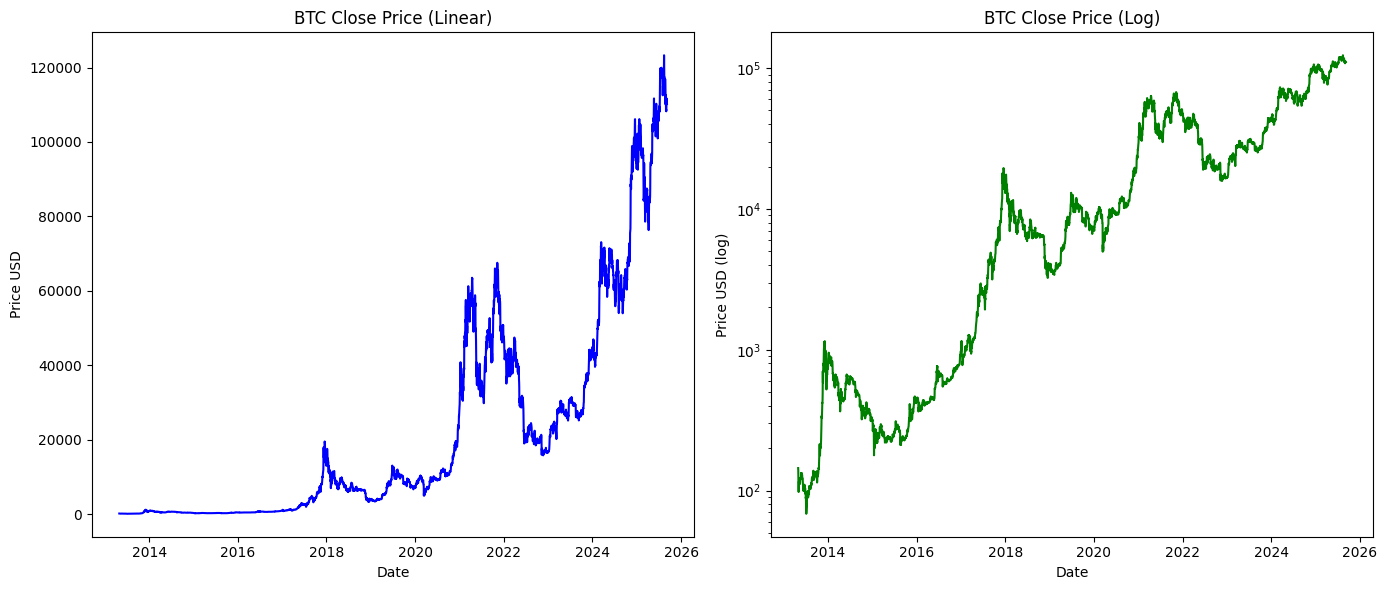

In [21]:
# --- Plot BTC Close Price: linear & log scale ---
plt.figure(figsize=(14,6))

# Linear scale
plt.subplot(1,2,1)
plt.plot(df_combined.index, df_combined["Close"], color="blue")
plt.title("BTC Close Price (Linear)")
plt.xlabel("Date")
plt.ylabel("Price USD")

# Log scale
plt.subplot(1,2,2)
plt.plot(df_combined.index, df_combined["Close"], color="green")
plt.yscale("log")
plt.title("BTC Close Price (Log)")
plt.xlabel("Date")
plt.ylabel("Price USD (log)")

plt.tight_layout()
plt.show()


**Observations from plots**:  
- Linear scale highlights recent high prices.  
- Log scale makes the early low-price periods visible and confirms smooth continuity over the years.


In [24]:
# --- Continuity check: last Kaggle vs first Binance close ---
kaggle_last = df_kaggle["Close"].iloc[-1]
binance_first = df_binance["Close"].iloc[0]

print(f"Last Kaggle close: {kaggle_last}")
print(f"First Binance close: {binance_first}")
print(f"Difference: {abs(kaggle_last - binance_first):.2f} USD")

Last Kaggle close: 34235.19345116
First Binance close: 34220.01
Difference: 15.18 USD


**Continuity check observations**:  
- The last Kaggle close and first Binance close differ by only a few dollars — stitching is smooth.

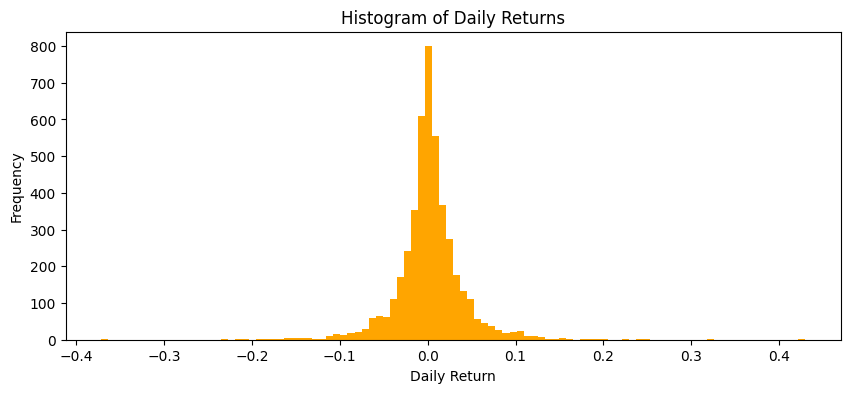

In [25]:
# --- Daily returns histogram ---
df_combined["Return"] = df_combined["Close"].pct_change()
plt.figure(figsize=(10,4))
plt.hist(df_combined["Return"].dropna(), bins=100, color="orange")
plt.title("Histogram of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()


**Observations on returns**:  
- BTC returns are highly volatile, with a long tail on both positive and negative sides.  
- This volatility will inform strategy design and risk management in later steps.
